In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris_dataset = datasets.load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris_dataset.feature_names)
print(iris_dataset.data[0:5])
print(iris_dataset.target_names)
print(iris_dataset.target[0:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


In [4]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris_dataset['data']
y = iris_dataset['target']

X_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)
X_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


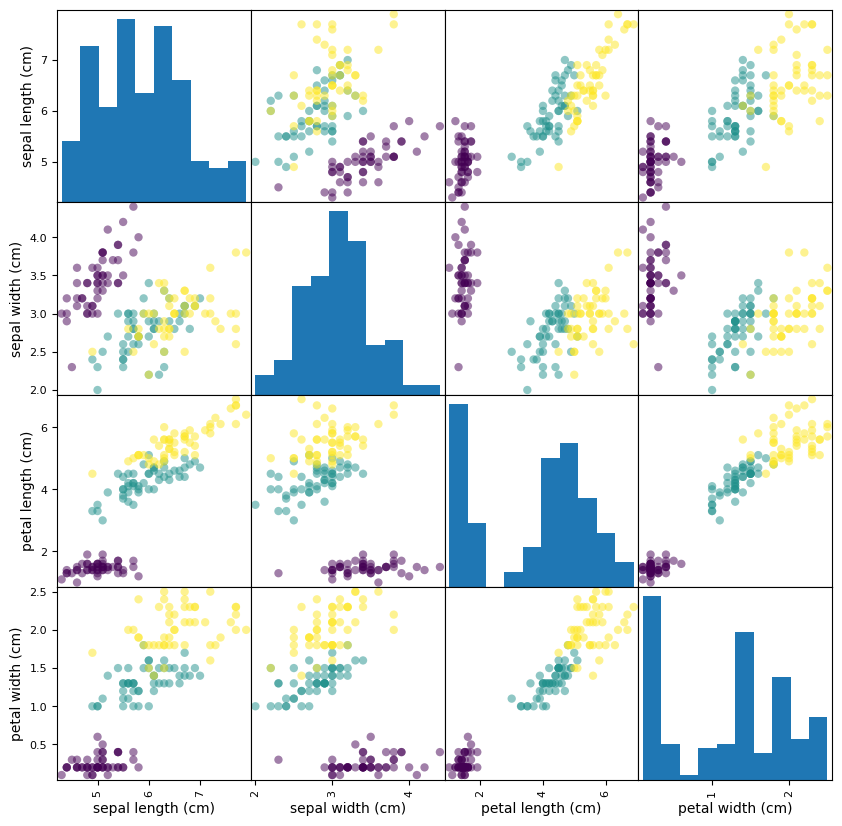

In [6]:
# scatter matrix
_ = pd.plotting.scatter_matrix(X_dataframe, c=y, figsize=(10, 10), marker='o')

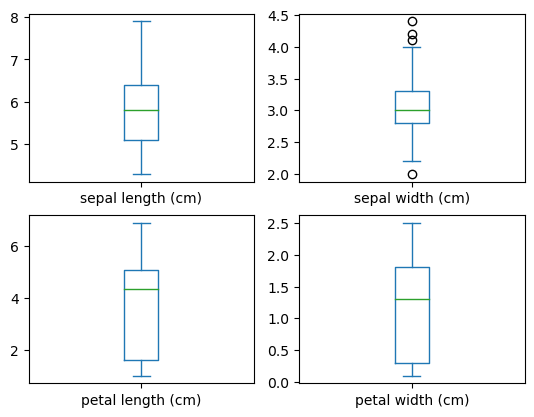

In [7]:
# box and whisker plots
X_dataframe.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [9]:
k_range = list(range(1,50))
train_score, test_score = validation_curve(
    KNeighborsClassifier(), 
    X_train, 
    y_train,
    param_name="n_neighbors",
    param_range=k_range,
    cv=5, 
    scoring="accuracy"
)
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

In [10]:
print("Number of rows in train_score: {}".format(len(train_score)))
print("Number of rows in test_score: {}".format(len(test_score)))

print("First five rows of train_score: \n{}\n".format(train_score[0:5]))
print("First five rows of test_score: \n{}\n".format(test_score[0:5]))

print("Mean of first five rows in train_scores: \n{}\n".format(mean_train_score[0:5]))
print("Mean of first five rows in test_scores: \n{}\n".format(mean_test_score[0:5]))

Number of rows in train_score: 49
Number of rows in test_score: 49
First five rows of train_score: 
[[1.         1.         1.         1.         1.        ]
 [0.96629213 0.96629213 0.95555556 0.97777778 0.96666667]
 [0.96629213 0.96629213 0.96666667 0.98888889 0.96666667]
 [0.96629213 0.95505618 0.97777778 0.98888889 0.96666667]
 [0.97752809 0.97752809 0.96666667 0.97777778 0.95555556]]

First five rows of test_score: 
[[0.95652174 0.91304348 1.         0.90909091 0.95454545]
 [0.91304348 0.86956522 1.         0.90909091 0.95454545]
 [0.95652174 0.91304348 1.         0.90909091 0.95454545]
 [0.95652174 0.91304348 1.         0.86363636 1.        ]
 [1.         0.95652174 0.95454545 0.86363636 1.        ]]

Mean of first five rows in train_scores: 
[1.         0.96651685 0.9709613  0.97093633 0.97101124]

Mean of first five rows in test_scores: 
[0.94664032 0.92924901 0.94664032 0.94664032 0.95494071]



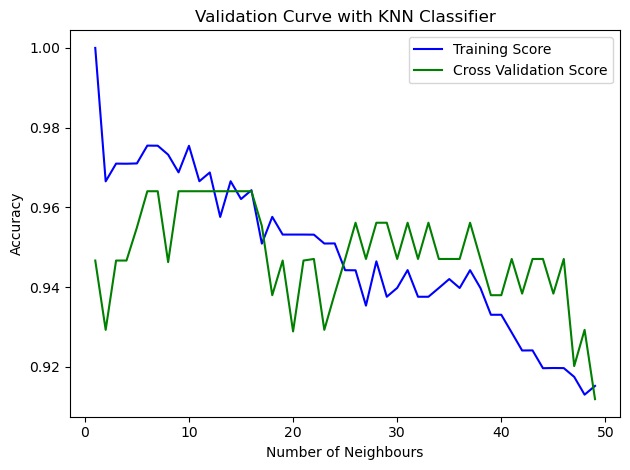

In [11]:
plt.plot(k_range, mean_train_score, label="Training Score", color='b')
plt.plot(k_range, mean_test_score, label="Cross Validation Score", color='g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [12]:
model = KNeighborsClassifier(n_neighbors=11)

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
number_of_correct_predictions = (
    y_predicted == y_test
).sum()
number_of_predictions = len(y_predicted)
percentage_correct = round(number_of_correct_predictions/number_of_predictions, 4)
print(
    f"{number_of_correct_predictions}/{number_of_predictions} ({percentage_correct}) "
    "of predictions are correct"
)

37/38 (0.9737) of predictions are correct
